In [161]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

Text(0.5, 0, 'Time (us)')

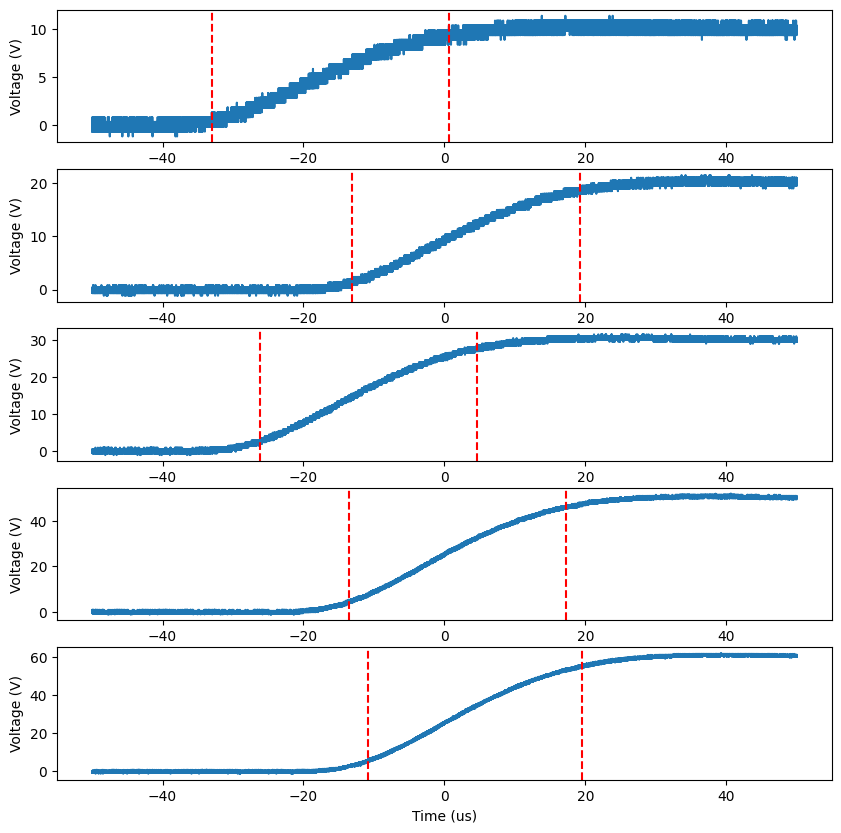

In [162]:


# specify the directory
directory = r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\Equipment\Time Constants\timeConstantDATA'

# create a list of file paths
file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file)) and not file.endswith('RF.csv')]


#make figure to contain all plots
fig, ax = plt.subplots((len(file_paths)), 1, figsize=(10, 10))

#loop through all files in the directory

time_constants = []
voltages = [10,20,30,50,60]
for j,file in enumerate(file_paths):
    data = np.loadtxt(file, delimiter=',', skiprows=2)
    ys = data[:,1]
    xs = data[:,0]
    ax[j].plot(xs*1e6, ys*25)
    maxval = np.max(ys)
    slope_start = np.where(ys > maxval*0.1)[0][0]
    slope_end = np.where(ys > maxval*0.9)[0][0]
    ax[j].axvline(xs[slope_start]*1e6, color='r', linestyle='--')
    ax[j].axvline(xs[slope_end]*1e6, color='r', linestyle='--')
    ax[j].set_ylabel('Voltage (V)')

    time_constants.append(xs[slope_end] - xs[slope_start])
ax[-1].set_xlabel('Time (us)')

(0.0, 70.0)

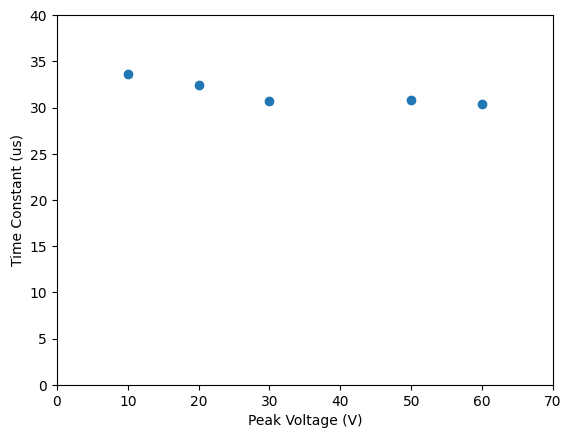

In [163]:
fig,ax = plt.subplots(1,1)
ax.plot(np.array(voltages), np.array(time_constants)*1e6, 'o')
ax.set_xlabel('Peak Voltage (V)')
ax.set_ylabel('Time Constant (us)')
ax.set_ylim(0,40)
ax.set_xlim(0,70)

Text(0.5, 1.0, 'Time Constant = 61.96 µs')

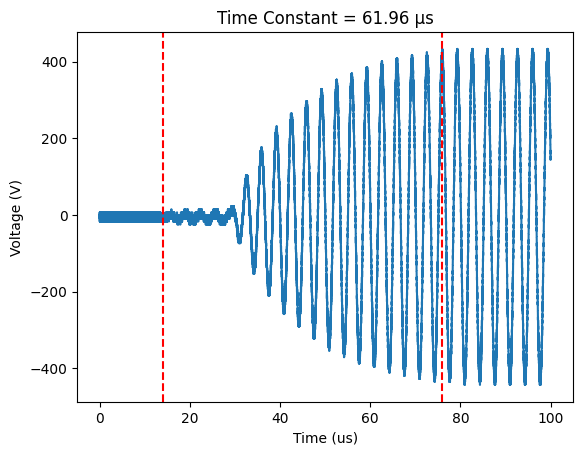

In [164]:
rf_files = [os.path.join(directory, file) for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file)) and file.endswith('RF.csv')]

file = r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\Equipment\Time Constants\timeConstantDATA\scope_400_3RF.csv'

data = np.loadtxt(file, delimiter=',', skiprows=2)
ts = data[:,0]
vs = data[:,1]

fig,ax = plt.subplots(1,1)
ax.plot((ts-ts[0])*1e6,vs*100)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')



firstmarker = 14
ax.axvline(firstmarker, color='r', linestyle='--')
max_marker = np.where(vs > np.max(vs)*0.99)[0][0]

ax.axvline((ts[max_marker]-ts[0])*1e6, color='r', linestyle='--')
ax.set_title('Time Constant = {0:.2f} µs'.format((ts[max_marker]-ts[0])*1e6-firstmarker))

Text(0.5, 1.0, 'Time Constant = 46.96 µs')

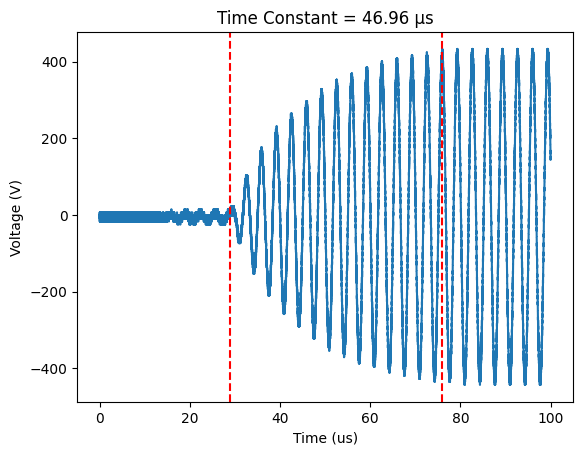

In [165]:
fig,ax = plt.subplots(1,1)
ax.plot((ts-ts[0])*1e6,vs*100)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')

firstmarker = 29
ax.axvline(firstmarker, color='r', linestyle='--')
max_marker = np.where(vs > np.max(vs)*0.99)[0][0]

ax.axvline((ts[max_marker]-ts[0])*1e6, color='r', linestyle='--')
ax.set_title('Time Constant = {0:.2f} µs'.format((ts[max_marker]-ts[0])*1e6-firstmarker))

Text(0.5, 1.0, '$b$ = 0.14 / µs')

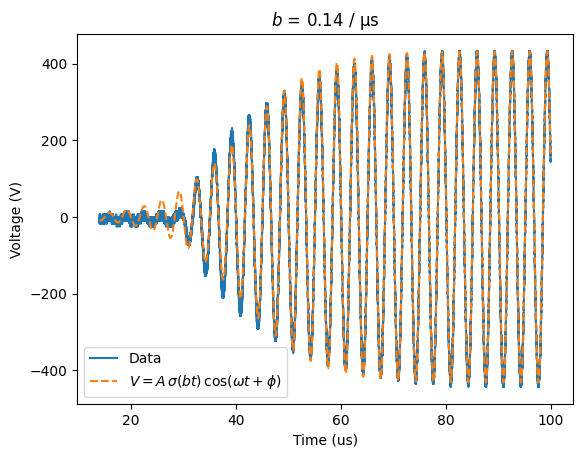

In [ ]:
"""
Does the above data fit with a sigmoid scaled cosine?
"""

def sigmoid_cosine(t, sigmoid_scale,offset, frequency, phase):
    return 432*np.exp(sigmoid_scale*(t-offset)) / (1 + np.exp(sigmoid_scale*(t-offset))) *np.cos(frequency*t + phase)

def sigmoid(t, sigmoid_scale,offset):
    return 432*np.exp(sigmoid_scale*(t-offset)) / (1 + np.exp(sigmoid_scale*(t-offset)))
fig, ax = plt.subplots(1,1)
ax.plot((ts-ts[0])[ts-ts[0] > 14*1e-6]*1e6, vs[ts-ts[0] > 14*1e-6]*100, label = 'Data')
guess = [1e6,30*1e-6,2*np.pi*300*1e3,0]
# ax.plot((ts-ts[0])[ts-ts[0] > 14*1e-6], sigmoid_cosine((ts-ts[0])[ts-ts[0] > 14*1e-6], *guess))
popt, pcov = curve_fit(sigmoid_cosine, (ts-ts[0]), vs*100, p0=guess,maxfev = 10000)
ax.plot((ts-ts[0])[ts-ts[0] > 14*1e-6]*1e6, sigmoid_cosine((ts-ts[0])[ts-ts[0] > 14*1e-6], *popt), ls = '--', label = r'$V = A\,\sigma(bt)\,\cos(\omega t + \phi)$')

ax.legend()
ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (us)')

ax.set_title(r'$b$ = {0:.2f} / µs'.format(popt[0]*1e-6))
